In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
import matplotlib.pyplot as plt

In [2]:
def negPred(df, par, chi):
    arr = []
    if par != 100:
        for i in range(len(df)):
            if (df.iloc[i]["neg"] == 1) or (df.iloc[i]["preds"][par] == 1 and df.iloc[i]["preds"][chi] == 0):
                arr.append(True)
            else:
                arr.append(False)
    else:
        for i in range(len(df)):
            if (df.iloc[i]["neg"] == 1) or (df.iloc[i]["preds"][chi] == 0):
                arr.append(True)
            else:
                arr.append(False)
    df["neg"] = arr
    return df

In [3]:
with open('../3_go_dict/hierarchy.pkl', 'rb') as f:
    go = pickle.load(f)

In [4]:
with open('../3_go_dict/classes.pkl', 'rb') as f:
    dic = pickle.load(f)

In [5]:
df = pd.read_pickle("../4_SeqVec/DatasetFin.pkl")

In [6]:
len(df)

34451

# Data set imbalance

In [7]:
dic_imbal_prev = {}
pred_sum = np.sum(df["preds"])
for e,i in enumerate(dic):
    dic_imbal_prev[i] = pred_sum[e]

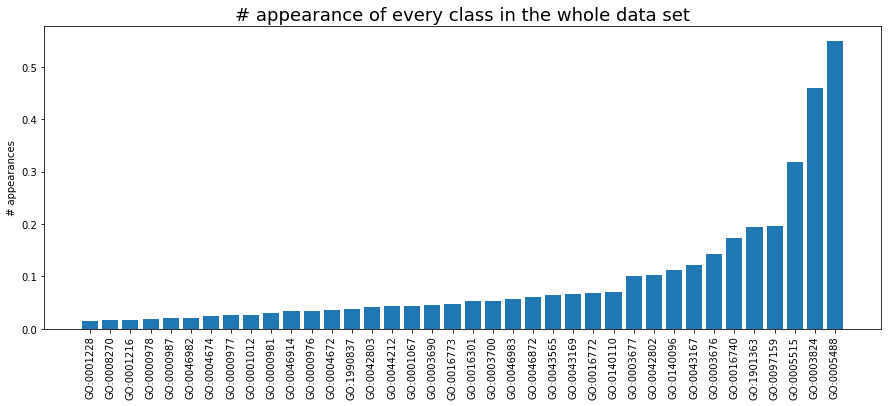

In [8]:
a=plt.figure(figsize=(15, 7))
sorts = sorted(dic_imbal_prev.items(), key=lambda x: x[1])
terms = [i[0] for i in sorts]
probs = [i[1] for i in sorts]
plt.bar(terms, np.divide(probs, len(df)))
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
#plt.yscale('log')
plt.title('# appearance of every class in the whole data set')
#plt.xlabel('GO term class')
plt.ylabel('# appearances')
plt.subplots_adjust(bottom=0.3, top=0.90)
plt.show()
#a.savefig("Figures/DatasetImbalancePrev.png")

# Homology reduction

### Create fasta from dataset

In [9]:
ofile = open("dataset.fasta", "w")
for i in range(len(df)):
    ofile.write(">" + df.iloc[i]["UniProt_ID"] + "\n" +df.iloc[i]["Seq"] + "\n")
ofile.close()

In [23]:
dftest = pd.read_pickle("Testset.pkl")

In [25]:
ofiles = open("testset.fasta", "w")
for i in range(len(dftest)):
    ofiles.write(">" + dftest.iloc[i]["UniProt_ID"] + "\n" +dftest.iloc[i]["Seq"] + "\n")
ofiles.close()

### read homology reduced fasta

In [10]:
seqs = []
with open("fasta50", "r") as f:
    for line in f.readlines():
        if line[0] == ">":
            seqs.append(line[1:].strip())

In [11]:
truth = []
for i in df["UniProt_ID"]:
    if i in seqs:
        truth.append(True)
    else:
        truth.append(False)

In [12]:
df_homred = df[truth]

In [13]:
df_homred.to_pickle("DatasetHomology50")

In [14]:
df = pd.read_pickle("DatasetHomology50")

In [15]:
len(df)

21493

# Dataset Imbalance After HomRed

In [16]:
dic_imbal = {}
pred_sum = np.sum(df["preds"])
for e,i in enumerate(dic):
    dic_imbal[i] = pred_sum[e]

In [17]:
a=np.divide(probs_after,21492)

NameError: name 'probs_after' is not defined

In [15]:
b = np.divide(probs, 34000)

In [ ]:
a=plt.figure(figsize=(15, 7))
sorts = sorted(dic_imbal.items(), key=lambda x: x[1])
terms = [i[0] for i in sorts]
probs_after = [i[1] for i in sorts]
abc = 
plt.bar(terms, np.divide(probs,len(df)))
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
#plt.yscale('log')
plt.title('% of appearance of every class in the data set')
#plt.xlabel('GO term class')
plt.ylabel('% of appearance')
plt.subplots_adjust(bottom=0.3, top=0.90)
plt.show()
#a.savefig("Figures/DatasetImbalanceAfter.png")

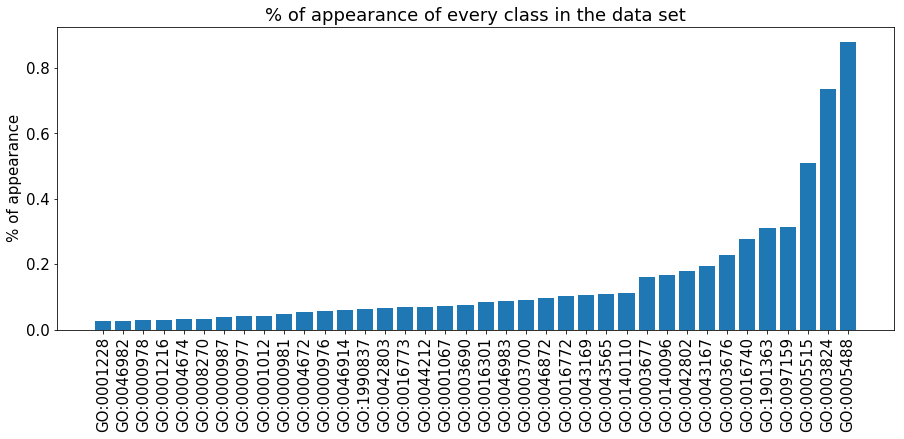

In [12]:
a=plt.figure(figsize=(15, 7))
sorts = sorted(dic_imbal.items(), key=lambda x: x[1])
terms = [i[0] for i in sorts]
probs_after = [i[1] for i in sorts]
plt.bar(terms, np.divide(probs,len(df)))
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
#plt.yscale('log')
plt.title('% of appearance of every class in the data set')
#plt.xlabel('GO term class')
plt.ylabel('% of appearance')
plt.subplots_adjust(bottom=0.3, top=0.90)
plt.show()
#a.savefig("Figures/DatasetImbalanceAfter.png")

# Compare after and prev class imbalance

In [24]:
after = np.divide(list(dic_imbal.values()), 21493)

In [25]:
prev = np.divide(list(dic_imbal_prev.values()), 34451)

In [26]:
np.subtract(after, prev)

array([-0.00139725, -0.00245304, -0.00255011, -0.00268063, -0.00190092,
       -0.00228956, -0.00056602, -0.0013293 , -0.00172835,  0.00603318,
        0.00395651, -0.00082003,  0.00023105, -0.00222846, -0.0080818 ,
       -0.00636035, -0.00490279, -0.01481813,  0.00128562, -0.00839516,
       -0.00184954, -0.00528641, -0.00760234,  0.00306004, -0.00294308,
       -0.00364845, -0.00067849,  0.00158686, -0.00057797,  0.00036615,
        0.00212087, -0.0052914 , -0.00663877,  0.00184419, -0.00756029,
        0.00183083,  0.00244913, -0.00066318])

# Go on with Dataset Creation

In [18]:
df_train, df_test = train_test_split(df, random_state = 42, test_size = 0.1)

In [19]:
np.divide(np.sum(df_test["preds"]), (np.sum(df["preds"])-np.sum(df_test["preds"])))

array([0.1105919 , 0.10991379, 0.11986301, 0.11764706, 0.10982659,
       0.10970464, 0.11602871, 0.13398693, 0.12977099, 0.11010768,
       0.10196078, 0.10593714, 0.125     , 0.11157633, 0.12065814,
       0.12012012, 0.10688971, 0.09893993, 0.10557185, 0.12412178,
       0.1107433 , 0.117598  , 0.11818182, 0.1026506 , 0.0990753 ,
       0.11528269, 0.11996779, 0.10188088, 0.11658654, 0.1188455 ,
       0.11857143, 0.1299639 , 0.10684647, 0.11076362, 0.11439842,
       0.12110225, 0.11002639, 0.10461957])

# Stop here

In [21]:
df_train.to_pickle("Trainset.pkl")
df_test.to_pickle("Testset.pkl")

In [22]:
for i in dic:
    if i != "GO:0003674":
        dfpos = pd.read_pickle("Trainset.pkl")
        dfneg = pd.read_pickle("Trainset.pkl")

        dfpos["pos"] = dfpos["preds"].apply(lambda x: x[dic[i]]==1)
        dfpos = dfpos[dfpos["pos"]]

        dfneg["neg"] = np.zeros(len(dfneg))
        for j in go[i]['is_a']:
            if j!= "GO:0003674":
                dfneg = negPred(dfneg, dic[j], dic[i]) 
            else:
                dfneg = negPred(dfneg, 100, dic[i])

        dfneg = dfneg[dfneg["neg"]]

        dfpos["result"] = 1
        dfneg["result"] = 0

        dfin = pd.concat([dfpos[["SeqVec","result"]], dfneg[["SeqVec","result"]]])
        
        ratio = len(dfin[dfin["result"]==1])/len(dfin)
        df_train = shuffle(pd.read_pickle("Trainset.pkl"), random_state = 42)
        
        if ratio > 0.6:
            df_train_neg = df_train[df_train["preds"].apply(lambda x: x[dic[i]]==0)]
            start = 0
            while ratio > 0.6:
                while True:
                    if not df_train_neg.index[start] in dfin.index:
                        dfin = dfin.append(df_train_neg.iloc[start])
                        start += 1
                        break   
                    start += 1
                ratio = len(dfin[dfin["result"]==1])/len(dfin)
            dfin = dfin.fillna(0)
        

        dfin.to_pickle("DatasetsBalanced/Dataset_"+i.strip()+".pkl")

# Data Imbalance after solving it

In [17]:
dic_bal = {}
for i in dic:
    pos = dic[i]
    df = pd.read_pickle("DatasetsBalanced/Dataset_"+i.strip()+".pkl")
    pred_sum = np.sum(df["result"]==1)
    dic_bal[i] = pred_sum/len(df)

In [83]:
sorts = sorted(dic_bal.items(), key=lambda x: x[1])

In [87]:
with open("go_order","wb") as f:
    pickle.dump(sorts, f)

In [15]:
with open("go_imbal_order","wb") as f:
    pickle.dump(sorted(dic_imbal.items(), key=lambda x:x[1]), f)

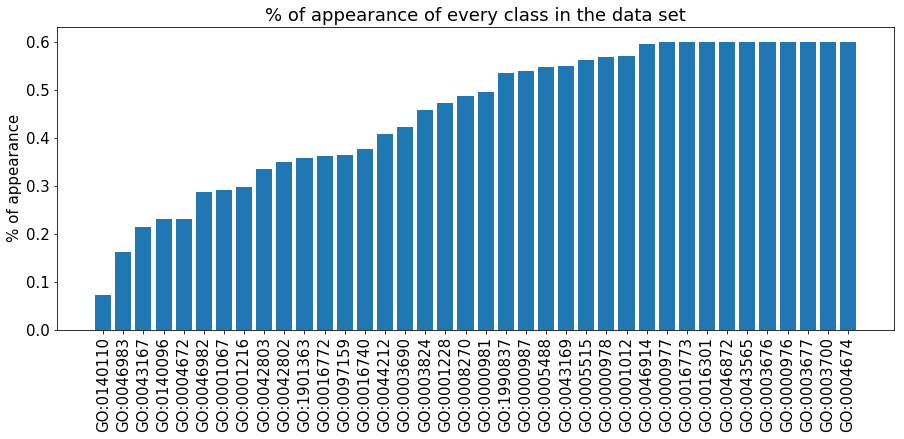

In [81]:
a=plt.figure(figsize=(15, 7))
sorts = sorted(dic_bal.items(), key=lambda x: x[1])
terms = [i[0] for i in sorts]
probs = [i[1] for i in sorts]
plt.bar(terms, probs)
plt.rcParams.update({'font.size': 15})
plt.xticks(rotation=90)
#plt.yscale('log')
plt.title('% of appearance of every class in the data set')
#plt.xlabel('GO term class')
plt.ylabel('% of appearance')
plt.subplots_adjust(bottom=0.3, top=0.90)
plt.show()
#a.savefig("Figures/DatasetImbalanceAfter.png")

# Comparing Data set imbalance

In [14]:
sorts = sorted(dic_imbal.items(), key=lambda x: x[1])

In [28]:
imbalanced = [i[1]/21493 for i in sorts]

In [29]:
balanced = []
for i in sorts:
    balanced.append(dic_bal[i[0]])

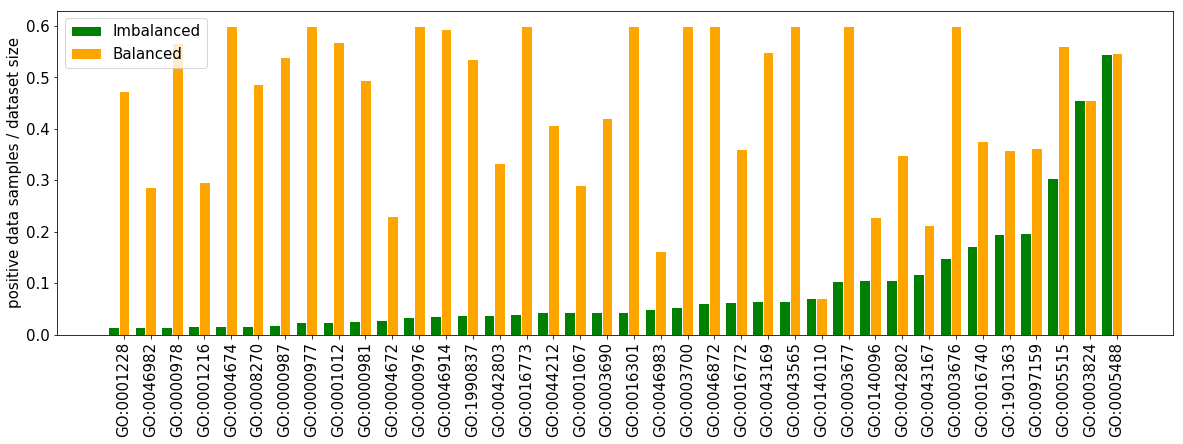

In [30]:
# set width of bar
barWidth = 0.4
 
# set height of bar
bars1 = imbalanced
bars2 = balanced
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
# Make the plot
plt.rcParams.update({'font.size': 15})

a=plt.figure(figsize=(20, 7.5))
plt.bar(r1, bars1, color='green', width=barWidth, edgecolor='white', label='Imbalanced')
plt.bar(r2, bars2, color='orange', width=barWidth, edgecolor='white', label='Balanced')
#plt.yscale('log')
# Add xticks on the middle of the group bars
plt.ylabel('positive data samples / dataset size')
plt.xticks([r + barWidth for r in range(len(bars1))], [i[0] for i in sorts])
plt.xticks(rotation=90)
plt.subplots_adjust(bottom=0.3, top=0.90)

 
# Create legend & Show graphic
plt.legend()
plt.show()
a.savefig("Figures/datasetsimbalances.png")

# Solve Data Imbalance

In [19]:
for name in dic:
    if name != "GO:0003674":
        pos = dic[name]
        df = shuffle(pd.read_pickle("DatasetsImbalanced/Dataset_"+name+".pkl"), random_state=21)
        df_train = shuffle(pd.read_pickle("Trainset.pkl"), random_state = 42)
        ratio = len(df[df["result"]==1])/len(df)
        if ratio < 0.4: #debugg here!
            df = df.sort_values("result")
            while ratio < 0.4:
                start = 0
                while True:
                    if df.iloc[start]["result"] == 0:
                        df = df.drop(df.index[start])
                        ratio = len(df[df["result"]==1])/len(df)
                        break
                    else:
                        start += 1
            df.to_pickle("DatasetsBalanced/Dataset_"+name+".pkl")
        elif ratio > 0.6:
            df_train_neg = df_train[df_train["preds"].apply(lambda x: x[dic[name]]==0)]
            start = 0
            while ratio > 0.6:
                while True:
                    if not df_train_neg.index[start] in df.index:
                        df = df.append(df_train_neg.iloc[start])
                        start += 1
                        break   
                    start += 1
                ratio = len(df[df["result"]==1])/len(df)
            df = df.drop(["Go_terms", "Seq", "UniProt_ID", "preds"], axis = 1)
            df = df.fillna(1)
            df.to_pickle("DatasetsBalanced/Dataset_"+name+".pkl")
        else:
            df.to_pickle("DatasetsBalanced/Dataset_"+name+".pkl")